# Исследование спроса на авиабилеты

## 1. Описание данных

**query_1.csv**:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv**:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

**query_last.csv**:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

## 2. Функции

In [1]:
import warnings
warnings.filterwarnings('ignore')

# загрузка/сохранение данных
import requests
from urllib.parse import urlencode

import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

In [2]:
def get_url(link):
    """
    Получение адреса для скачивания с Яндекс.Диск
    link - ссылка на Яндекс.Диск
    """
    print("Run", link)
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    final_url = base_url + urlencode(dict(public_key=link))
    response = requests.get(final_url)
    url = response.json()['href']
    return url

In [3]:
def check_hypothesis(sample_1, sample_2, alpha = 0.05, alternative=None):
    """
    Функция проверки нулевой гипотезы
    """
    results = st.mannwhitneyu(sample_1, sample_2, alternative=alternative)
    print('p-value:', results.pvalue)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не удалось отвергнуть нулевую гипотезу')

In [4]:
def draw_plot(data, x, y, title='default', height=5, width=10, orient='h'):
    sns.catplot(y=y, x=x, data=data, kind="bar", orient=orient, 
                height=height, aspect=width/height);
    plt.title(title);

In [5]:
LINK_1 = "https://yadi.sk/d/JQC9rIqRxzKOfw"    # данные 1
LINK_2 = "https://yadi.sk/d/UdSJ7RJA_yPHpw"    # данные 2
LINK_3 = "https://yadi.sk/d/HPRzf3J3ro4p1w"    # данные 3

# planes_data = "/datasets/query_1.csv"
# flights_data = "/datasets/query_3.csv"
# tickets_data = "/datasets/query_last.csv"

## 3. Аналитика

In [6]:
planes = pd.read_csv(get_url(LINK_1))
flights = pd.read_csv(get_url(LINK_2))
tickets = pd.read_csv(get_url(LINK_3))

Run https://yadi.sk/d/JQC9rIqRxzKOfw
Run https://yadi.sk/d/UdSJ7RJA_yPHpw
Run https://yadi.sk/d/HPRzf3J3ro4p1w


In [7]:
planes

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [8]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [9]:
flights.sample(10)

,city,average_flights
34,Курган,3.419355
87,Усть-Илимск,2.870968
83,Улан-Удэ,1.608696
93,Чебоксары,5.000000
62,Пенза,4.000000
6,Белгород,6.000000
2,Анапа,2.161290
78,Сыктывкар,4.129032
17,Геленджик,2.590909
66,Псков,1.548387


In [10]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [11]:
flights.duplicated().sum()

0

In [12]:
flights.city.duplicated().sum()

0

В данных о моделях самолетов и среднем количестве рейсов нет пропусков и дубликатов, типы занных заданы корректно.

In [13]:
flights_top = flights.sort_values(
    'average_flights', ascending=False).head(10).reset_index(drop=True)
flights_top

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


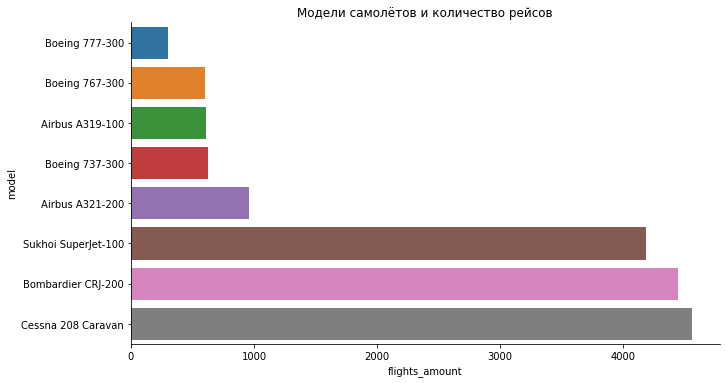

In [14]:
draw_plot(planes.sort_values('flights_amount'), 'flights_amount', 'model',
          title='Модели самолётов и количество рейсов');

По графику "Модели самолетов и количество рейсов" видно, что топ-3 наиболее используемых моделей:
* Cessna 208 Caravan
* Bombardier CRJ-200
* Sukhoi SuperJet-100

У моделей _Boeing 767-300, Airbus A319-100, Boeing 737-300 примерно одинаковое количество рейсов.

Самая популярная модель - _Cessna 208 Caravan_ , самая непопулярная - _Boeing 777-300_.

In [15]:
flights

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


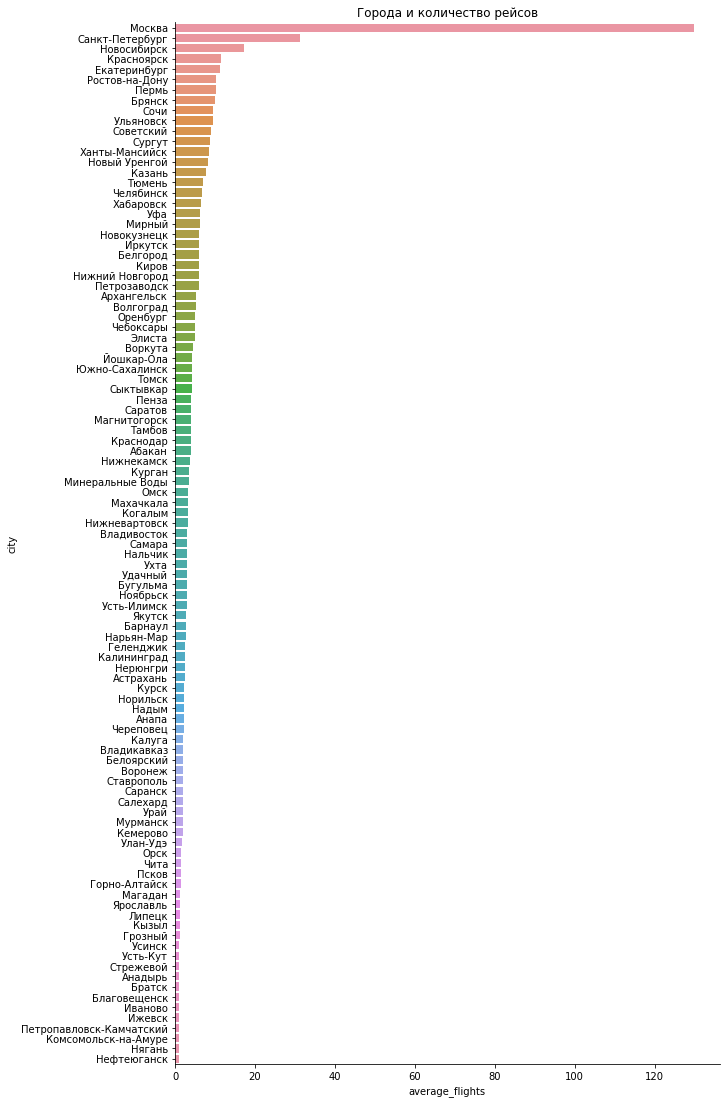

In [16]:
draw_plot(flights.sort_values('average_flights', ascending=False), 
          'average_flights', 'city',
          title='Города и количество рейсов', height=15)

Из графика 'Города и количество рейсов' следует, что с наибольним количеством рейсов город Москва. Топ-3 города:
* Москва
* Санкт-Петербург
* Новосибирск

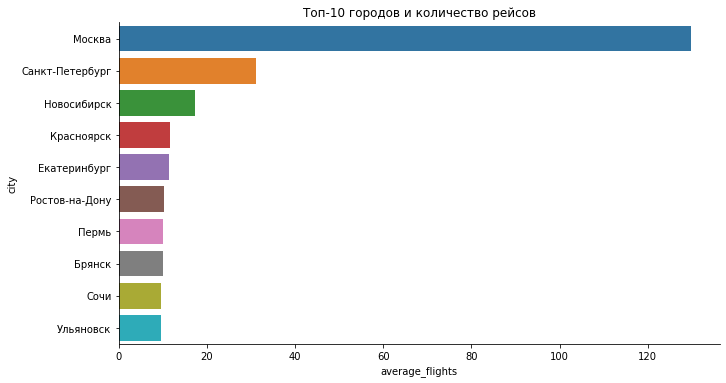

In [17]:
# топ-10 городов и количество рейсов
draw_plot(flights_top, 
          'average_flights', 'city',
          title='Топ-10 городов и количество рейсов', height=5)

По графику 'Топ-10 городов и количество рейсов' можно сделать вывод, что практически одинаковое количество рейсов для городов:
* Красноярск
* Екатеринбург
* Ростов-на-Дону
* Пермь
* Брянск
* Сочи
* Ульяновск

## 4. Проверка гипотезы

In [18]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   week_number    10 non-null     int64  
 1   ticket_amount  10 non-null     int64  
 2   festival_week  3 non-null      float64
 3   festival_name  3 non-null      object 
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [19]:
tickets

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


В данных присутствуют пропуски - в признаках *festival_name* и "festival_week". Заполним эти значения.

In [20]:
tickets['festival_week'] = tickets['festival_week'].fillna(0)
tickets['festival_week'] = tickets['festival_week'].astype('int64')

In [21]:
tickets['festival_name'] = tickets['festival_name'].fillna('Нет')

In [22]:
tickets

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30,Park Live
1,31,51034,31,Пикник Афиши
2,32,51675,0,Нет
3,33,51378,0,Нет
4,34,51492,0,Нет
5,35,51360,0,Нет
6,36,51386,36,Видфест
7,37,51670,0,Нет
8,38,51518,0,Нет
9,39,51623,0,Нет


Посмотрим на распределение спроса на билеты:
* все
* во время фестивалей
* без фестивалей

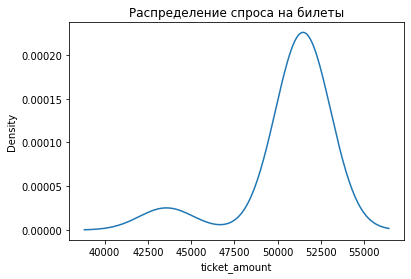

In [23]:
sns.distplot(tickets.ticket_amount, hist=False);
plt.title('Распределение спроса на билеты');

Из графика спроса видно, что распределение не подчиняется нормальному распределению - не унимодально.

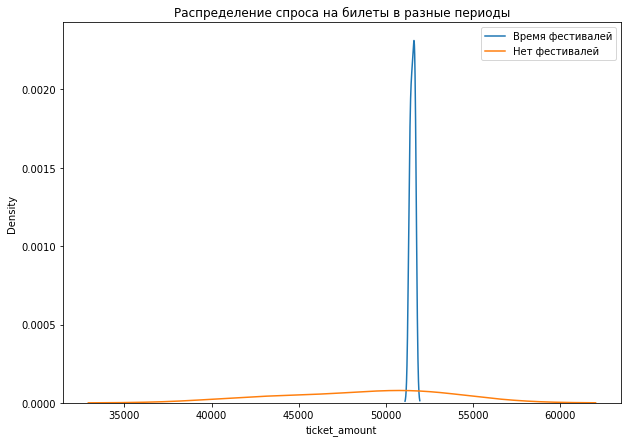

In [24]:
festivals_no = tickets[tickets.festival_week == 0].ticket_amount
festivals_yes = tickets[tickets.festival_week != 0].ticket_amount

_, ax = plt.subplots(figsize=(10,7))
sns.distplot(festivals_no, hist=False);
sns.distplot(festivals_yes, hist=False);
plt.title('Распределение спроса на билеты в разные периоды');
plt.legend(['Время фестивалей','Нет фестивалей']);

In [25]:
festivals_no.describe()

count        7.000000
mean     51530.857143
std        130.933098
min      51360.000000
25%      51435.000000
50%      51518.000000
75%      51646.500000
max      51675.000000
Name: ticket_amount, dtype: float64

In [26]:
festivals_yes.describe()

count        3.000000
mean     48662.666667
std       4415.619700
min      43568.000000
25%      47301.000000
50%      51034.000000
75%      51210.000000
max      51386.000000
Name: ticket_amount, dtype: float64

Для данных с фестивалями и без них - лишь 3 и 7 значений соответственно. Распределение значений унимодально, симметрично и имеет лишь 2 и 6 степени свободы - Т-распределение. Посмотрим на QQ-график.

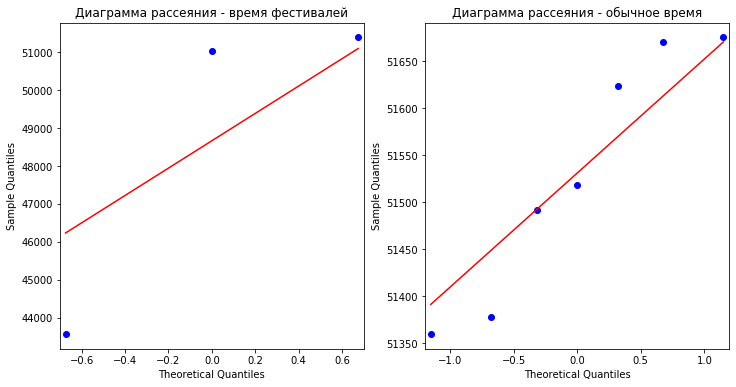

In [27]:
_, axes = plt.subplots(1, 2, figsize=(12,6))
qqplot(festivals_yes, line='s', ax=axes[0])
qqplot(festivals_no, line='s', ax=axes[1])
axes[0].set_title('Диаграмма рассеяния - время фестивалей')
axes[1].set_title('Диаграмма рассеяния - обычное время')
plt.show()

Сформулируем гипотезы.

**H0:** "Средний спрос на билеты во время фестивалей равен среднему спросу в обычное время".

**H1:** "Средний спрос на билеты во время фестивалей отличается (не равен) от среднего спроса на билеты в обычное время".

Так как в двух выборках данные распределены неодинаково, а дисперсия отличается, то для проверки гипотезы будет использоваться двусторонний тест Манна-Уитни с alpha=0.05.

In [28]:
check_hypothesis(festivals_yes, festivals_no, alternative='two-sided')

p-value: 0.06824748837800128
Не удалось отвергнуть нулевую гипотезу


Данных мало, что быть уверенным в выводах на 100%, но согласно результатам теста, нет оснований отвергнуть нулевую гипотезу. Таким образом, в изучаемые периоды спрос на билеты в обычное время и во время фестивалей не отличается. Требуется дополнительный сбор данных для подтверждения.

## Вывод

Согласно проведенному анализу предоставленных данных сделаны выводы:

* топ-3 наиболее используемых моделей самолётов: "Cessna 208 Caravan", "Bombardier CRJ-200", "Sukhoi SuperJet-100";
* для некоторых моделей самолётов количество рейсов почти одинаковое;
* самая популярная модель - Cessna 208 Caravan.
* Москва - город с наибольшим количеством рейсов;
* топ-3 города с наибольшим количеством рейсов: Москва, Санкт-Петербург, Новосибирск;
* спрос на билеты не отличается в обычное время и во время фестивалей, но требуется дополнительный сбор данных для подтверждения.